<a href="https://colab.research.google.com/github/carlosfmorenog/CMM560/blob/main/CMM560_Topic_5/CMM560_T5_BinarisationChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 5 Binarisation Challenge (Bonus)

This is my proposal to solve the challenge, doing it in two steps:
1. Define a binarisation function which turns near-white pixels to full white. This will turn all the background into 255 values.
2. Define an inverse binarisation function which ignores white (255) pixels. This will turn near-white pixels into black (i.e. the Python we want to keep) and darker pixels (i.e. the Python we want to disappear) into white, merging it with the background

In [ ]:
# get the image from my dropbox (yet another way to load data to an online notebook!)
!wget -O logo.png https://www.dropbox.com/s/6qm9qr46zd1uqgr/logo.png?raw=1

--2024-07-23 10:53:29--  https://www.dropbox.com/s/6qm9qr46zd1uqgr/logo.png?raw=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/uduhlkpmrmabyf7skbdyk/logo.png?rlkey=fb0fywpbcz7yotvwxkuija1u1&raw=1 [following]
--2024-07-23 10:53:29--  https://www.dropbox.com/scl/fi/uduhlkpmrmabyf7skbdyk/logo.png?rlkey=fb0fywpbcz7yotvwxkuija1u1&raw=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce566b88b8a7bfba9f2a042790d.dl.dropboxusercontent.com/cd/0/inline/CXMArGH9eXUCc3mLstWH9cTvRleyArSa4RU0a1MEufY_ce1WM_KqqvzqGAnICnDjAUvHDTNZB7u4gY-urXjocxpNs1GC_4F9vEMm_uvtLfU_GilQdeZNguTjQAAcTAa7s4DqK-2tPN2bp-j_e3LnOiTn/file# [following]
--2024-07-23 10:53:30--  https://uce566b88b8a7bfba9f2a042790d.dl.dropboxusercontent.com/cd/0/in

In [ ]:
import cv2
import matplotlib.pyplot as plt

def binarise_w(img, threshold):
    img_bin = img.copy()
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if img[x,y]>threshold:
                img_bin[x,y]=255
    plt.imshow(img_bin, cmap='Greys_r')
    return img_bin

def binarise_inv_nowhite(img, threshold):
    img_bin = img.copy()
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if img[x,y]!=255:
                if img[x,y]>threshold:
                    img_bin[x,y]=0
                else:
                    img_bin[x,y]=255
    plt.imshow(img_bin, cmap='Greys_r')
    return img_bin


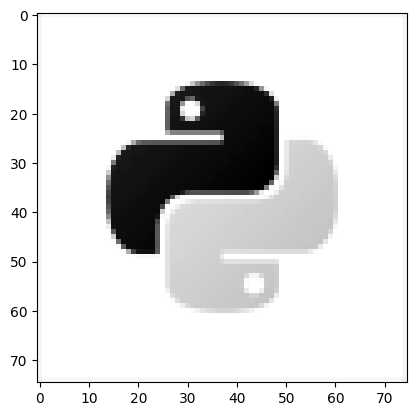

In [ ]:
# Load and print the image
img = cv2.imread("/content/logo.png",0)
plt.imshow(img, cmap='Greys_r')

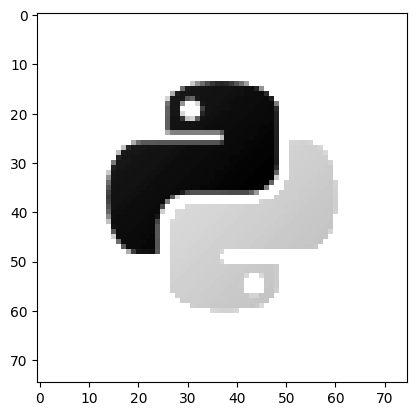

In [ ]:
# I first run the original binarisation function to turn the background white
# You can see that the edges of the light grey python have changed
img_bin = binarise_w(img, 215)

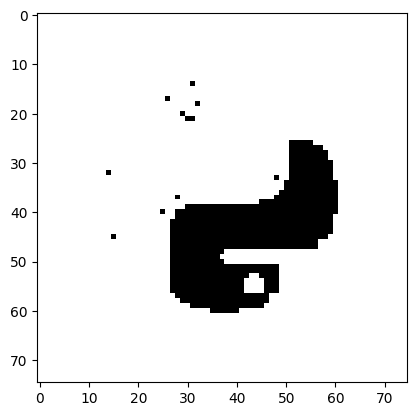

In [ ]:
# Then I run the new binarisation function to convert the lighter python into a dark one
img_bin = binarise_inv_nowhite(img_bin, 200)

Note that I could use a morphology operation (as the ones seen in class) to improve the result

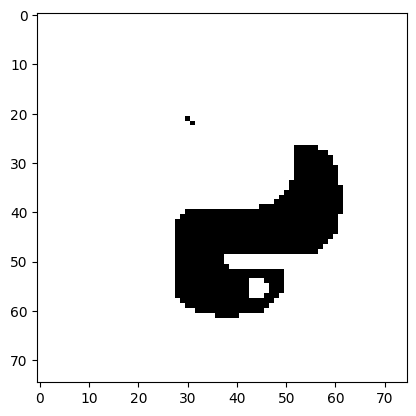

In [ ]:
# You can change the values of the structuring element to obtain different results
opening = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2)))
plt.imshow(opening, cmap='Greys_r')

You can find more information on how to apply morphological operations in Python [here](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html)